In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [96]:
def gaussian(x,a,b,c): #a-height, b-center, c-std, d-vertical shift
    return a*np.exp(-(x-b)**2/(2*c**2))

In [97]:
import pandas as pd
run1 = pd.read_table('run1',names = ['AV','OutV'])
run2 = pd.read_table('Run2.txt')
run3 = pd.read_table('run3')
run4 = pd.read_table('run4')
run5 = pd.read_table('run5')

run7 = pd.read_table('Run 7')
run8 = pd.read_table('Run 8')
run9 = pd.read_table('Run 9')
run10 = pd.read_table('Run 10')
run11 = pd.read_table('Run 11')
run12 = pd.read_table('Run 12')
run13 = pd.read_table('Run 13')
run14 = pd.read_table('Run 14')
run15 = pd.read_table('Run 15')
run16 = pd.read_table('Run 16')

Run1=np.array(run1)
Run2=np.array(run2)
Run3=np.array(run3)
Run4=np.array(run4)
Run5=np.array(run5)

Run7=np.array(run7)
Run8=np.array(run8)
Run9=np.array(run9)
Run10=np.array(run10)
Run11=np.array(run11)
Run12=np.array(run12)
Run13=np.array(run13)
Run14=np.array(run14)
Run15=np.array(run15)
Run16=np.array(run16)

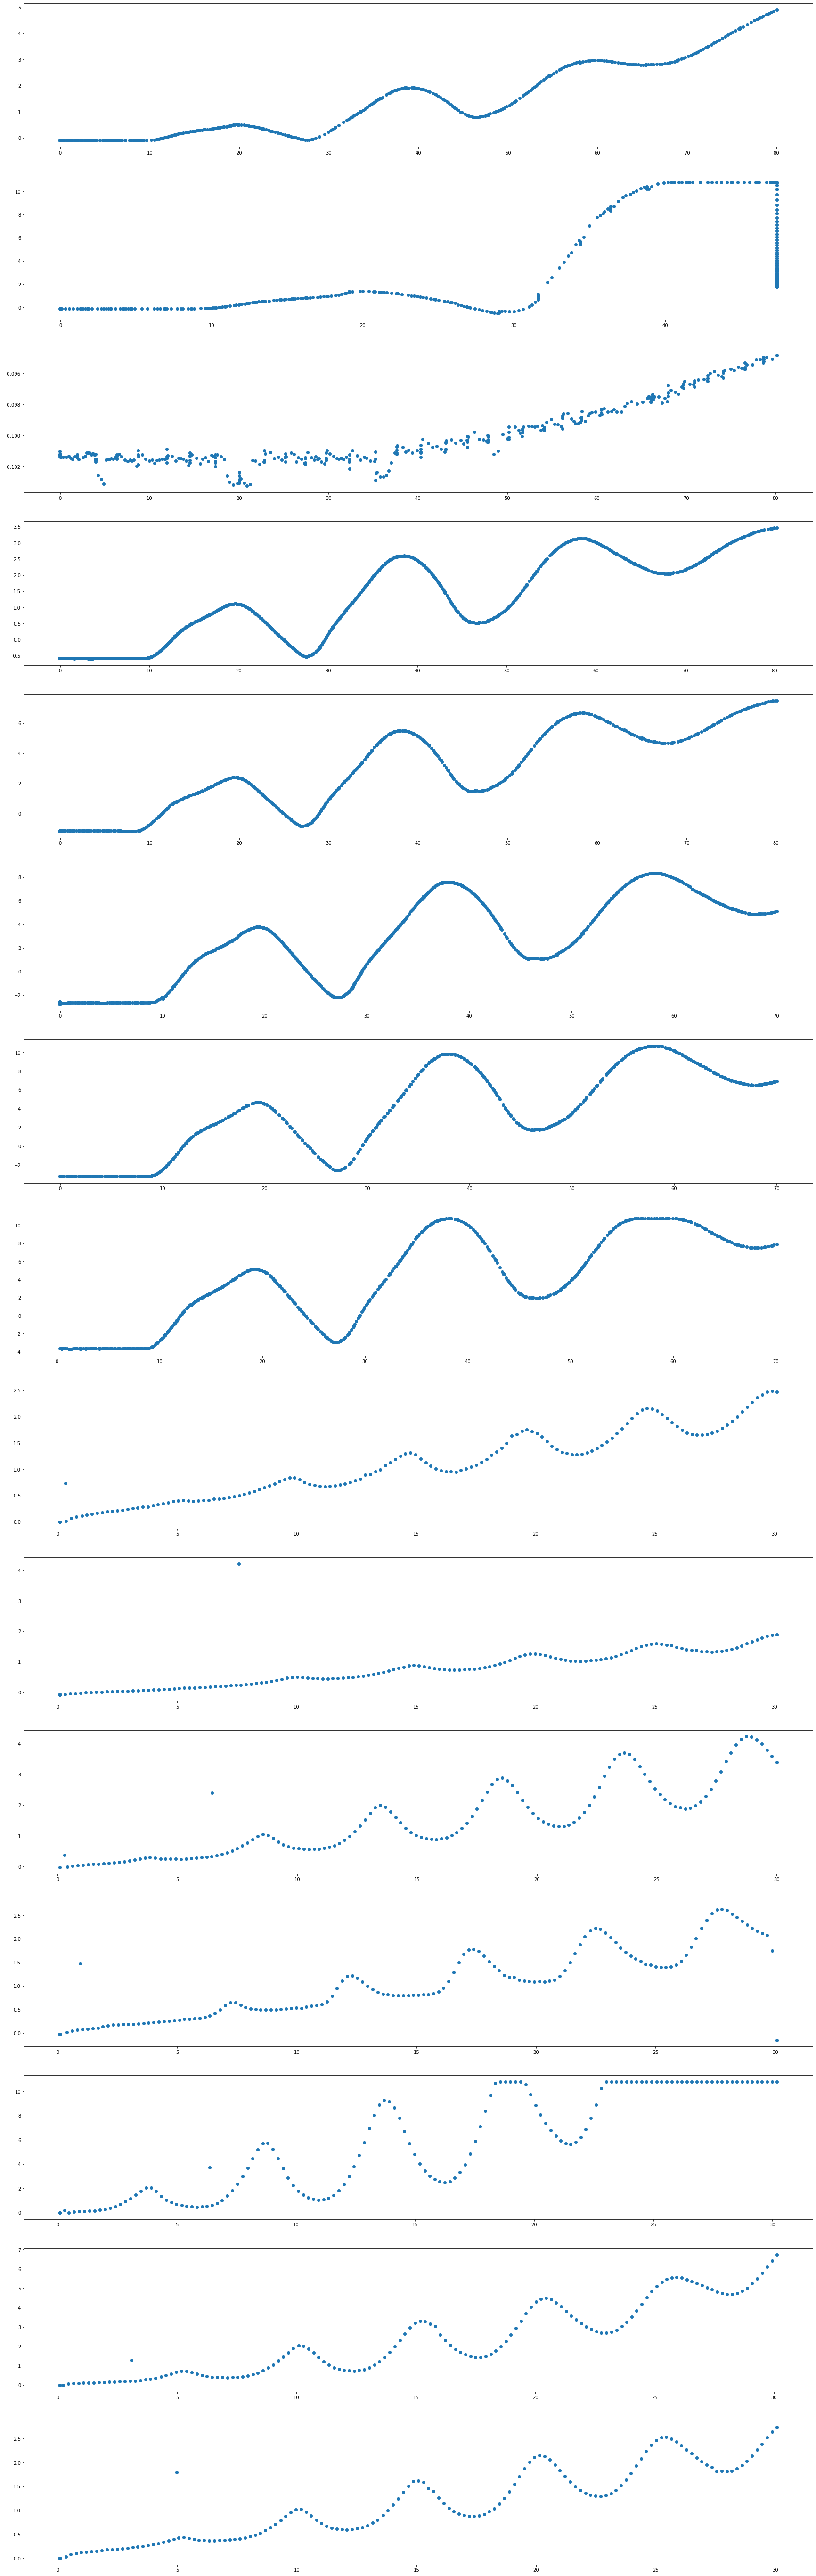

In [98]:
fig,axs = plt.subplots(15,figsize = (30,100))

axs[0].scatter(Run1[:,0],Run1[:,1])
axs[1].scatter(Run2[:,0],Run2[:,1])
axs[2].scatter(Run3[:,0],Run3[:,1])
axs[3].scatter(Run4[:,0],Run4[:,1])
axs[4].scatter(Run5[:,0],Run5[:,1])

axs[5].scatter(Run7[:,0],Run7[:,1])
axs[6].scatter(Run8[:,0],Run8[:,1])
axs[7].scatter(Run9[:,0],Run9[:,1])
axs[8].scatter(Run10[:,0],Run10[:,1])
axs[9].scatter(Run11[:,0],Run11[:,1])
axs[10].scatter(Run12[:,0],Run12[:,1])
axs[11].scatter(Run13[:,0],Run13[:,1])
axs[12].scatter(Run14[:,0],Run14[:,1])
axs[13].scatter(Run15[:,0],Run15[:,1])
axs[14].scatter(Run16[:,0],Run16[:,1])

In [213]:
def fittogauss(data,guesses,a,b,col,title):
    x = data[a:b,0]
    y = data[a:b,1]
    init_vals = [guesses[0],guesses[1],guesses[2]]
    best_vals,covar = curve_fit(gaussian,x,y,p0=init_vals)
    x1 = np.linspace(data[a,0],data[b,0],100)
    #x1 = np.linspace(0,data[len(data)-1,0],100)
    y1 = np.zeros(100)
    for i in range(0,100):
        y1[i]=gaussian(x1[i],best_vals[0],best_vals[1],best_vals[2])
    plt.plot(x1,y1,col)
    plt.title(title)
    plt.xlabel('Accelerating Voltage (V)')
    plt.ylabel('Out Voltage (V)')
    plt.scatter(data[:,0],data[:,1],c='black',s=1)
    err = np.sqrt(np.diag(covar))
    return best_vals,err

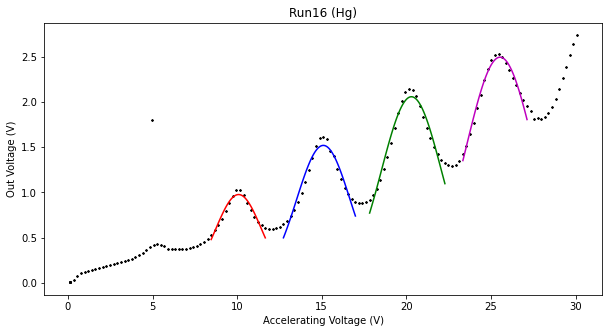

In [226]:
plt.figure(figsize = (10,5))
R16P1 = fittogauss(Run16,[1.5,10,.2],45,60,'r','Run16')
R16P2 = fittogauss(Run16,[1,15,.5],65,85,'b','Run16')
R16P3 = fittogauss(Run16,[1.5,20,.5],89,110,'g','Run16')
R16P4 = fittogauss(Run16,[1.5,26,.5],115,133,'m','Run16 (Hg)')

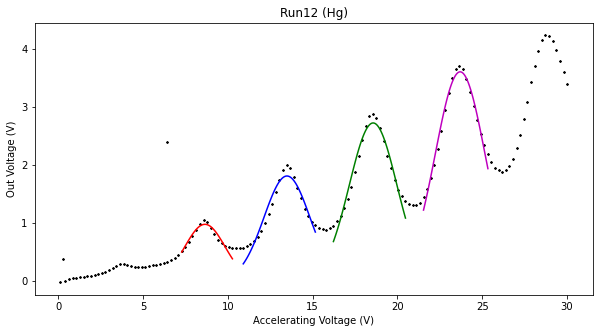

In [227]:
plt.figure(figsize = (10,5))
R12P1 = fittogauss(Run12,[1.5,8,.5],35,49,'r','Run12 (Hg)')
R12P2 = fittogauss(Run12,[1.5,14,.5],52,72,'b','Run12')
R12P3 = fittogauss(Run12,[1.5,19,.5],77,97,'g','Run12')
R12P4 = fittogauss(Run12,[1.5,24,.5],102,120,'m','Run12 (Hg)')
#print(R12P1,"\n",R12P2,"\n",R12P3,"\n",R12P4,"\n",R15P5)

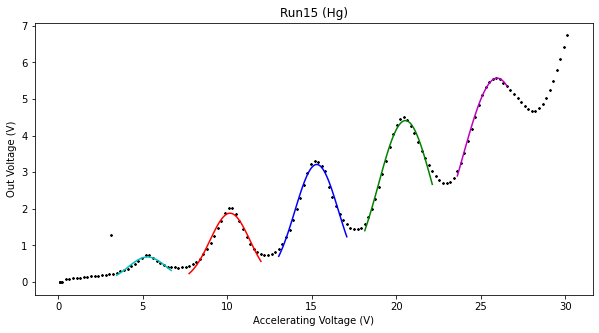

In [228]:
plt.figure(figsize = (10,5))
R15P0 = fittogauss(Run15,[1.5,5,.5],20,35,'c','Run15 (Hg)')
R15P1 = fittogauss(Run15,[1.5,10,.5],40,60,'r','Run15')
R15P2 = fittogauss(Run15,[1.5,14,.5],65,84,'b','Run15')
R15P3 = fittogauss(Run15,[1.5,22,.5],89,108,'g','Run15')
R15P4 = fittogauss(Run15,[1.5,28,.5],115,129,'m','Run15 (Hg)')
#print(R15P1,"\n",R15P2,"\n",R15P3,"\n",R15P4,"\n",R15P5)

In [229]:
space15 = ((R15P4[0]-R15P3[0])[1]+(R15P3[0]-R15P2[0])[1]+(R15P2[0]-R15P1[0])[1])/3
space12 = ((R12P4[0]-R12P3[0])[1]+(R12P3[0]-R12P2[0])[1]+(R12P2[0]-R12P1[0])[1])/3
space16 = ((R16P4[0]-R16P3[0])[1]+(R16P3[0]-R16P2[0])[1]+(R16P2[0]-R16P1[0])[1])/3
print(space16,space15,space12)

5.150604070150882 5.270712984147502 5.017495598472112


In [230]:
errspace15 = (np.sqrt((((R15P4[1]-R15P3[1])[1])**2+((R15P3[1]-R15P2[1])[1])**2+((R15P2[1]-R15P1[1])[1]))**2))/3
errspace12 = (np.sqrt((((R12P4[1]-R12P3[1])[1])**2+((R12P3[1]-R12P2[1])[1])**2+((R12P2[1]-R12P1[1])[1]))**2))/3
errspace16= (np.sqrt((((R16P4[1]-R16P3[1])[1])**2+((R16P3[1]-R16P2[1])[1])**2+((R16P2[1]-R16P1[1])[1]))**2))/3
print(errspace16,errspace15,errspace12)

0.0033557499765525995 0.0036760687627442512 0.0048530730511141


In [231]:
width15 = ((R15P1[0]+R15P2[0]+R15P3[0]+R15P4[0])[2])/4
width16 = ((R16P1[0]+R16P2[0]+R16P3[0]+R16P4[0])[2])/4
width12 = ((R12P1[0]+R12P2[0]+R12P3[0]+R12P4[0])[2])/4

In [232]:
print(width12,width16,width15)

1.3530684705044127 1.6706321602698755 1.5301369383372


In [233]:
print(((R12P1[0])[2],(R15P1[0])[2],(R16P1[0])[2]))

(1.1838626047481722, 1.181602395454678, 1.3579036873143797)


20.018340693160475


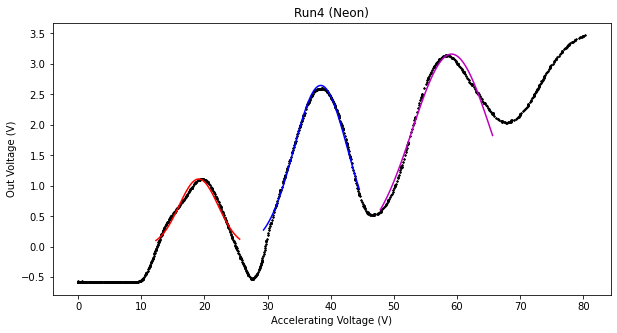

In [260]:
plt.figure(figsize = (10,5))
R4P1 = fittogauss(Run4,[1.5,19,3],260,540,'r','Run4 (Neon)')
R4P2 = fittogauss(Run4,[1.5,38,3],620,900,'b','Run4')
R4P3 = fittogauss(Run4,[1.5,57,3],950,1170,'m','Run4 (Neon)')
width1=(R4P3[0]-R4P2[0])[1]
width2 = (R4P2[0]-R4P1[0])[1]
print((width1+width2)/2)

In [242]:

dict = {'Run':[15,16,12],'Tube Temperature (C)':[150,170,180],'Avg Maxima Spacing':[space15,space16,space12],'Uncertainty (1 std)':[spacingerr12,spacingerr15,spacingerr16]}
df=pd.DataFrame(dict)
display(df)

,Run,Tube Temperature (C),Avg Maxima Spacing,Uncertainty (1 std)
0,15,150,5.270713,0.034178
1,16,170,5.150604,0.025112
2,12,180,5.017496,0.028191


In [236]:
err12 = np.zeros(3)
err15 = np.zeros(3)
err16 = np.zeros(3)
err4 = np.zeros(2)
list4 = [R4P1[1][1],R4P2[1][1],R4P3[1][1]]
list12 = [R12P1[1][1],R12P2[1][1],R12P3[1][1],R12P4[1][1]]
list15 = [R15P1[1][1],R15P2[1][1],R15P3[1][1],R15P4[1][1]]
list16 = [R16P1[1][1],R16P2[1][1],R16P3[1][1],R16P4[1][1]]
for i in range(0,3):
    err12[i] = np.sqrt((list12[3-i])**2+(list12[3-1-i])**2)
    err15[i] = np.sqrt((list15[3-i])**2+(list15[3-1-i])**2)
    err16[i] = np.sqrt((list16[3-i])**2+(list16[3-1-i])**2)
for i in range(0,2):    
    err4[i] = np.sqrt((list4[2-i])**2+(list4[2-1-i])**2)

In [237]:
print(err12)
print(err15)
print(err16)
print(err4)
spacingerr12 = (np.sqrt((err12[0])**2+(err12[1])**2+(err12[2])**2))/3
spacingerr15 = (np.sqrt((err15[0])**2+(err15[1])**2+(err15[2])**2))/3
spacingerr16 = (np.sqrt((err16[0])**2+(err16[1])**2+(err16[2])**2))/3
spacingerr4 = (np.sqrt((err4[0])**2+(err4[1])**2))/2
print(spacingerr12)
print(spacingerr15)
print(spacingerr16)
print(spacingerr4)

[0.04200582 0.06431908 0.06790994]
[0.05239368 0.03356208 0.04247539]
[0.04252438 0.05320557 0.05013235]
[0.03909286 0.0306553 ]
0.03417795390858554
0.025112347136910868
0.02819063680360578
0.024839479981280117


Text(0, 0.5, 'Peak Spacing (V)')

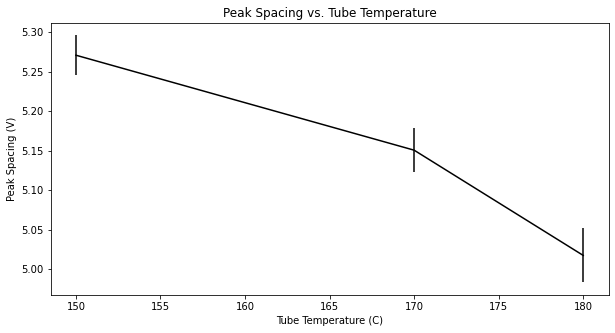

In [252]:
temperature = [150,170,180]
spacings = [space15,space16,space12]
err = [spacingerr15,spacingerr16,spacingerr12]
plt.figure(figsize = (10,5))
plt.errorbar(temperature,spacings,err,color ='k')
plt.title('Peak Spacing vs. Tube Temperature')
plt.xlabel('Tube Temperature (C)')
plt.ylabel('Peak Spacing (V)')